# OVO Tutorial #1: Multi-Scale Image Analysis and Edge Detection

In this tutorial, we'll explore:
1. Basic image operations and homography estimation
2. Multi-scale image analysis using image pyramids
3. Edge detection using the Canny algorithm

## Setup and Imports

note: send to antonio.silveti-falls@centralesupelec.fr

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Configure matplotlib for notebook display
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

# Part 1: Image Basics and Homography
## Exercise 1.1: Loading and Basic Image Properties

Explore the images basic properties:
- Display the image shape
- Print the data type
- Show the value range (min and max)
- Display the image using matplotlib

In [136]:
# We load the grayscale image using imread and specifying that it's a grayscale image in the second argument
gray = cv2.imread('graycat.jpg', cv2.IMREAD_GRAYSCALE)

Shape: (533, 800)
Type: uint8
Value Range: Min = 0 , Max = 255


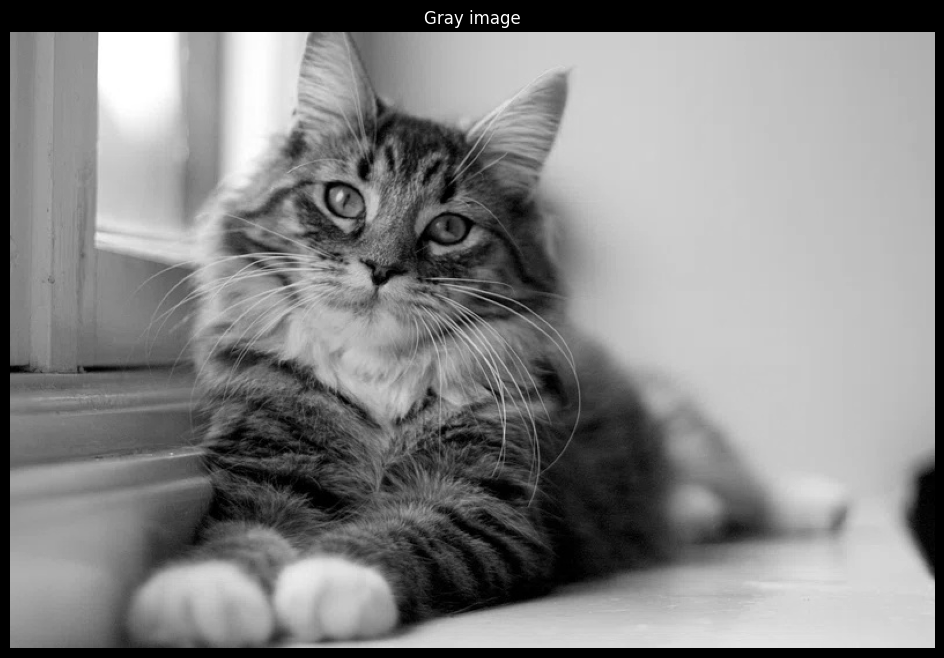

In [137]:
print("Shape:", gray.shape)
print("Type:", gray.dtype)
print("Value Range: Min =", gray.min(), ", Max =", gray.max())

plt.style.use('dark_background')  # to fix a bug of my pycharm darkmode
plt.imshow(gray, cmap='gray')
plt.title("Gray image")
plt.axis('off')  # Remove axes
plt.show()

## Exercise 1.2: Point Transformations

Implement two functions:
1. `adjust_brightness(image, beta)`: Adjusts image brightness by adding beta
2. `adjust_contrast(image, alpha)`: Adjusts image contrast by multiplying by alpha

Remember to:
- Convert to float for calculations
- Convert back to uint8

In [138]:
def adjust_brightness(image, beta):
    """Adjust brightness by adding a constant

    Args:
        image: uint8 image array
        beta: brightness adjustment (-255 to 255)
    """
    return cv2.convertScaleAbs(image, alpha=1.0, beta=beta)

def adjust_contrast(image, alpha):
    """Adjust contrast by multiplication

    Args:
        image: uint8 image array
        alpha: contrast adjustment (0 to 3)
    """
    return cv2.convertScaleAbs(image, alpha=alpha, beta=0)

# Test your implementation: beta in {50, -50} and alpha in {0.5, 1.5}

Shape: (533, 800)
Type: uint8
Value Range: Min = 50 , Max = 255


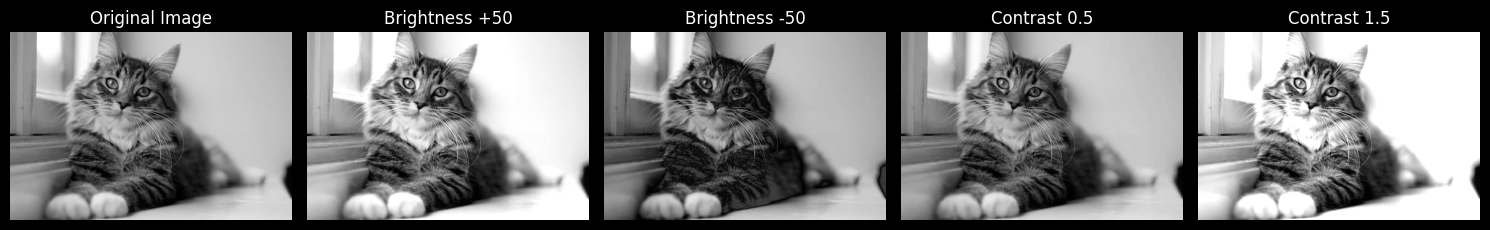

In [139]:
def display_images(patches, titles):
    fig, axes = plt.subplots(1, len(patches), figsize=(15, 5))
    for ax, patch, title in zip(axes, patches, titles):
                # Ensure images are grayscale
        if len(patch.shape) == 3:
            patch = cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY)
        ax.imshow(patch, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Tests
gray = cv2.imread('graycat.jpg', cv2.IMREAD_GRAYSCALE)
brightness_50 = adjust_brightness(gray, 50)
brightness_neg50 = adjust_brightness(gray, -50)
contrast_0_5 = adjust_contrast(gray, 0.5)
contrast_1_5 = adjust_contrast(gray, 1.5)


print("Shape:", brightness_50.shape)
print("Type:", brightness_50.dtype)
print("Value Range: Min =", brightness_50.min(), ", Max =", brightness_50.max())

images = [gray, brightness_50, brightness_neg50, contrast_0_5, contrast_1_5]
titles = ["Original Image", "Brightness +50", "Brightness -50", "Contrast 0.5", "Contrast 1.5"]

plt.style.use('dark_background')  # to fix a bug of my pycharm darkmode
display_images(images, titles)

## Exercise 1.3: Working with Image Patches

Implement the `extract_patch` function that extracts a rectangular region from an image:
- Take center coordinates and patch size as input
- Return the extracted patch

In [140]:
def extract_patch(image, center, size):
    """Extract a patch from the image

    Args:
        image: Input image
        center: (x, y) coordinates of patch center
        size: (width, height) of patch
    """
    x, y = center
    width, height = size

    x_start = max(0, x - width // 2)
    x_end = min(image.shape[1], x + width // 2)
    y_start = max(0, y - height // 2)
    y_end = min(image.shape[0], y + height // 2)

    patch = image[y_start:y_end, x_start:x_end]
    return patch

# Test your implementation with 100x100 patches centered at: the center of the image, the center of each quadrant (5 patches total)

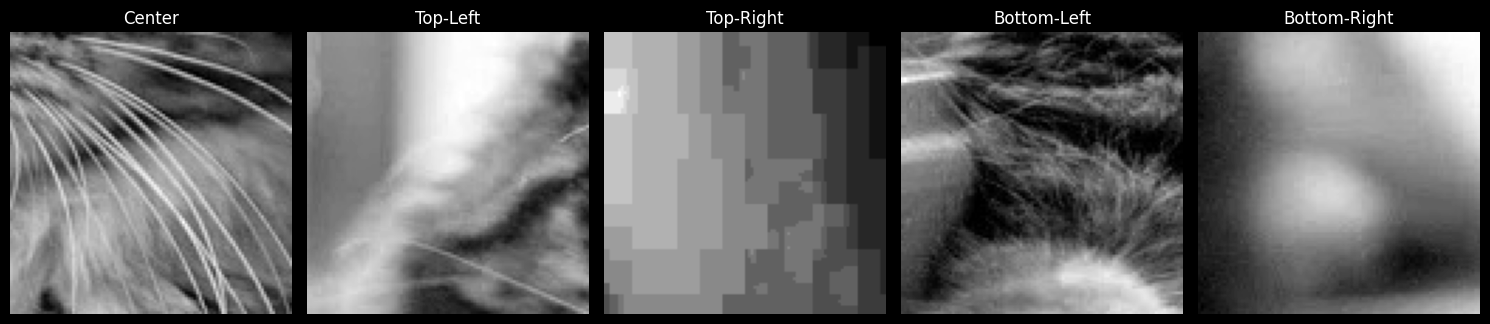

In [141]:
# Load the grayscale image
image_path = "graycat.jpg"  # Update with correct path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Image dimensions
h, w = image.shape
patch_size = (100, 100)

# Centers of patches
centers = [
    (w // 2, h // 2),                   # Center of the image
    (w // 4, h // 4),                   # Top-left quadrant center
    (3 * w // 4, h // 4),               # Top-right quadrant center
    (w // 4, 3 * h // 4),               # Bottom-left quadrant center
    (3 * w // 4, 3 * h // 4)            # Bottom-right quadrant center
]

# Extract patches
patches = [extract_patch(image, center, patch_size) for center in centers]
titles = ["Center", "Top-Left", "Top-Right", "Bottom-Left", "Bottom-Right"]

# Display patches

plt.style.use('dark_background')  # to fix a bug of my pycharm darkmode
display_images(patches, titles)

## Exercise 1.4: Frequency Analysis

For each extracted patch:
1. Compute the 2D FFT
2. Visualize the log magnitude spectrum
3. Compare with the spectrum of patches drawn from the `stripe.png` image

Questions to consider:
- How does the frequency content differ between smooth and detailed regions?
- What patterns (or lack thereof) do you see in the magnitude spectra?

*Answers: Smooth regions in an image primarily contain low-frequency components, which corresponds to gradual intensity variations. In the magnitude spectrum, this frequency content is concentrated at the center, indicating minimal edge or texture detail. In contrast, detailed regions, such as edges, textures, or fine patterns, exhibit high-frequency content spread outward in the magnitude spectrum.*

In [142]:
def compute_fft_magnitude(image):
    fft = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft)  # Shift zero frequency to the center
    magnitude = np.abs(fft_shifted)
    log_magnitude = np.log(1 + magnitude)
    return log_magnitude

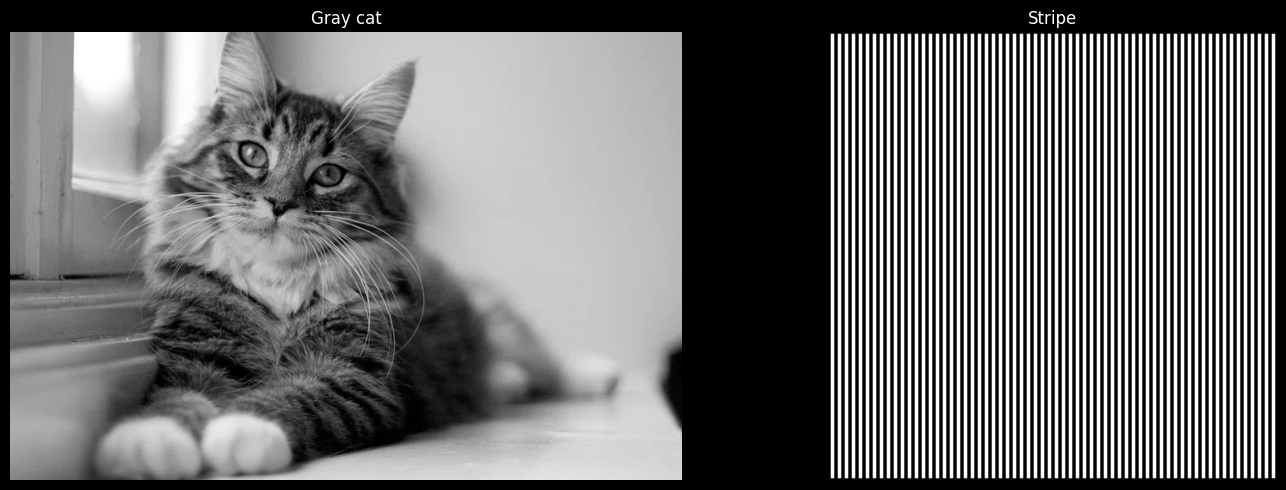

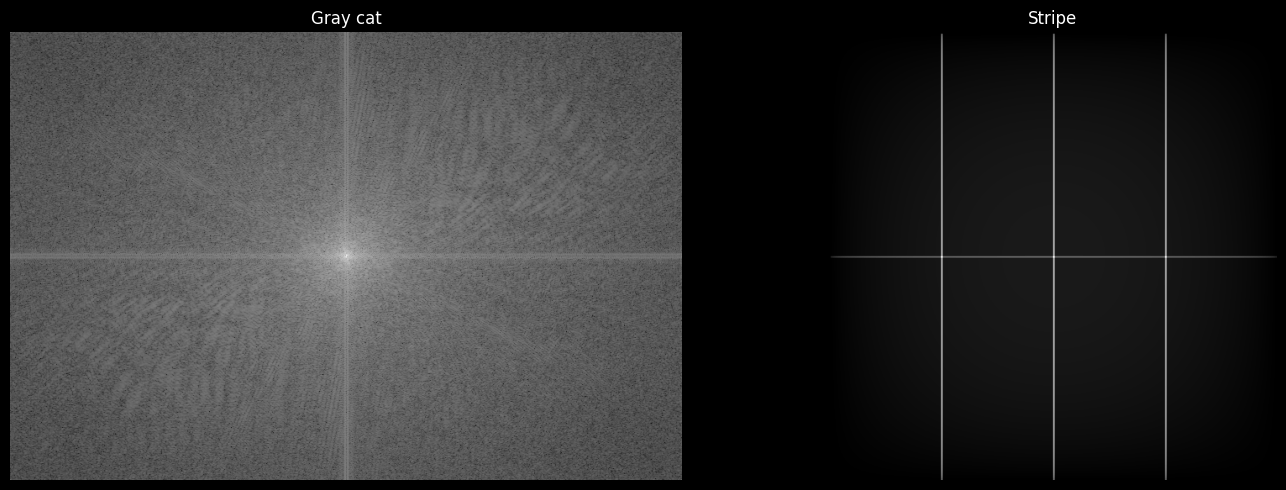

In [143]:
image_path = "stripe.png"  # Update with correct path
stripe = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
display_images([gray,stripe],['Gray cat', 'Stripe'])
gray_fft = compute_fft_magnitude(gray)
stripe_fft = compute_fft_magnitude(stripe)

plt.style.use('dark_background')  # to fix a bug of my pycharm darkmode
display_images([gray_fft,stripe_fft],['Gray cat', 'Stripe'])

## Exercise 1.5: Homography Estimation

In this exercise we will estimate the homography matrix given a set of correspondences between two images.

In [144]:
def estimate_homography_dlt(pts1, pts2):
    """Estimate homography matrix using DLT
    Args:
        pts1, pts2: Nx2 arrays of corresponding points (pts1 -> points in image 1, pts2 -> points in image 2)
    Returns:
        H: 3x3 homography matrix mapping pts1 to pts2
    """
    n = pts1.shape[0]
    A = []
    for i in range(n):
        x1, y1 = pts1[i]
        x2, y2 = pts2[i]
        A.append([-x1, -y1, -1, 0, 0, 0, x2 * x1, x2 * y1, x2])
        A.append([0, 0, 0, -x1, -y1, -1, y2 * x1, y2 * y1, y2])
    #SVD on A
    _, _, VT = np.linalg.svd(np.array(A))
    # Last column of V is the solution (=last lign of VT)
    h = VT[-1]
    # Reshape h to get 3x3 homography matrix 3x3
    H = h.reshape(3, 3)
    # Normalisation to get H[2, 2] = 1
    H = H / H[2, 2]
    return H

The following code will visualize your homography for you - you don't have to modify it, just define correctly the previous function

In [145]:
def verify_homography(img1, img2, H, padding_percent=10):
    """Verify homography by displaying a visual comparison of two images and their alignment

    Args:
        img1 (numpy.ndarray): First input image
        img2 (numpy.ndarray): Second input image
        H (numpy.ndarray): 3x3 homography matrix mapping img1 to img2
        padding_percent (int): Amount of padding to add around output image in percent

    Returns:
        numpy.ndarray: Blended result showing alignment of warped img1 with img2
    """

    # Ensure images are grayscale
    if len(img1.shape) == 3:
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    if len(img2.shape) == 3:
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    h2, w2 = img2.shape[:2]

    # Calculate padding
    pad_x = int(w2 * padding_percent / 100)
    pad_y = int(h2 * padding_percent / 100)

    # Create output size with padding
    out_w = w2 + 2*pad_x
    out_h = h2 + 2*pad_y

    # Adjust homography for the padding offset
    T = np.array([
        [1, 0, pad_x],
        [0, 1, pad_y],
        [0, 0, 1]
    ])
    H_adj = T @ H

    # Warp and create padded images
    img1_warped = cv2.warpPerspective(img1, H_adj, (out_w, out_h)).astype(np.uint8)
    img2_padded = np.zeros((out_h, out_w), dtype=np.uint8)
    img2_padded[pad_y:pad_y+h2, pad_x:pad_x+w2] = img2

    # Visualization
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(img1, cmap='gray')
    plt.scatter(pts1[:, 0], pts1[:, 1], c='r', s=100)
    plt.title('Image 1 with points')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(img2, cmap='gray')
    plt.scatter(pts2[:, 0], pts2[:, 1], c='r', s=100)
    plt.title('Image 2 with points')
    plt.axis('off')

    plt.subplot(133)
    blend = cv2.addWeighted(img1_warped, 0.5, img2_padded, 0.5, 0)
    plt.imshow(blend, cmap='gray')
    plt.title('Blended Result')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return cv2.addWeighted(img1_warped, 0.5, img2_padded, 0.5, 0)

# Correspondence points are provided
pts1 = np.array([[2023.2, 2350.1], [1408.0, 1536.8],
                 [1770.8, 2176.3], [1754.1, 2074.8]])
pts2 = np.array([[2982.5, 2398.1], [2354.1, 1538.9],
                 [2710.7, 2194.5], [2694.3, 2090.2]])

Load the images `grayforest1.jpg` and `grayforest2.jpg` and compute the homography between them using the given correspondence points

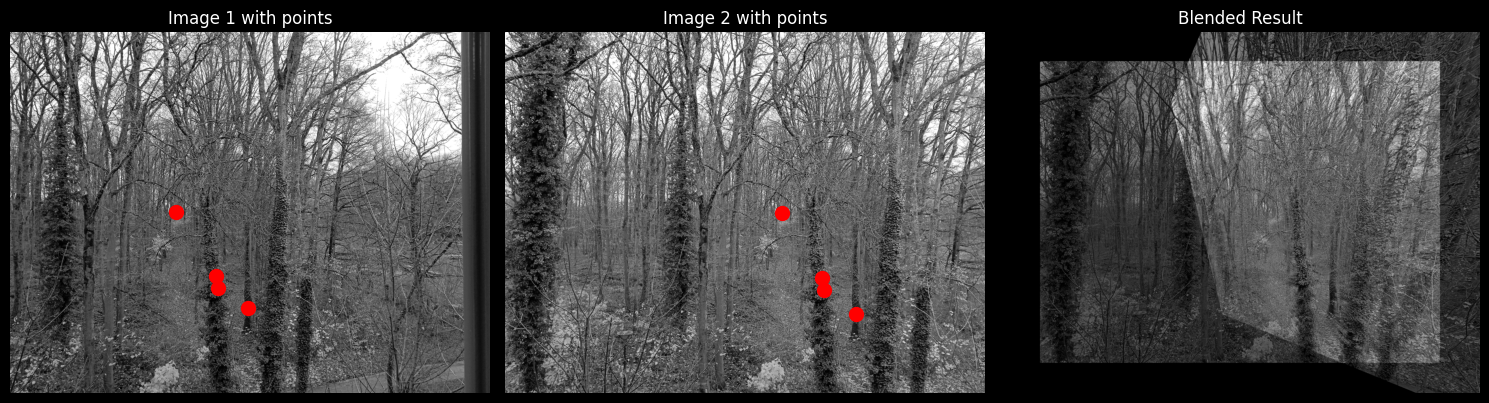

array([[ 0,  0,  0, ..., 36, 36, 38],
       [ 0,  0,  0, ..., 37, 38, 38],
       [ 0,  0,  0, ..., 38, 38, 40],
       ...,
       [ 0,  0,  0, ..., 54, 54, 55],
       [ 0,  0,  0, ..., 46, 46, 47],
       [ 0,  0,  0, ..., 40, 40, 42]], shape=(3686, 4896), dtype=uint8)

In [162]:
# Load the images
image_path = "grayforest1.jpg"  # Update with correct path
im1 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_path = "grayforest2.jpg"  # Update with correct path
im2 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
H = estimate_homography_dlt(pts1,pts2)
# Visualize results by calling the verify_homography function
verify_homography(im1,im2, H)

# Part 2: Multi-Scale Image Analysis
## Exercise 2.1: Convolution and Gaussian Kernels

First, implement a basic 2D convolution function:
1. Zero padding
2. Stride = 1 (simple convolution)
3. Test with simple kernels (e.g., blur, edge sharpen, edge)

In [147]:
def zero_pad(image, pad):
    """Add zero padding around the border of an image

    Args:
        image (numpy.ndarray): Input image to pad
        pad (int): Number of pixels of padding to add on all sides

    Returns:
        numpy.ndarray: Zero-padded image with original image in center
    """
    # Your code here
    return np.pad(image, pad_width=pad, mode='constant', constant_values=0)

def conv_2d(image, kernel):
    """Perform 2D convolution of an image with a kernel

    Args:
        image (numpy.ndarray): Input image to convolve
        kernel (numpy.ndarray): 2D convolution kernel

    Returns:
        numpy.ndarray: Result of convolving image with kernel

    Notes:
        Uses zero padding and stride=1
    """
    # Your code here
    # Flip the kernel for convolution
    kernel = np.flipud(np.fliplr(kernel))
    
    # Image dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Padding size
    pad_size = kernel_height // 2  # Assuming square kernel
    padded_image = zero_pad(image, pad_size)

    # Output image dimensions
    output = np.zeros_like(image)

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)

    return output

Now work with Gaussian kernels:

We provide a function to create Gaussian kernels.

Convolve one of the previous images with Gaussian kernels with varying size and $\sigma$.

In [148]:
def create_gaussian_kernel(size=5, sigma=1.0):
    """Create a 2D Gaussian kernel for filtering

    Args:
        size (int): Size of the kernel (must be odd)
        sigma (float): Standard deviation of the Gaussian distribution

    Returns:
        numpy.ndarray: Normalized 2D Gaussian kernel of shape (size, size)

    Raises:
        ValueError: If size is not odd
    """
    if size % 2 == 0:
        raise ValueError("Kernel size must be odd")

    x = np.linspace(-(size//2), size//2, size)
    y = x[:, np.newaxis]
    kernel = np.exp(-(x*x + y*y)/(2*sigma*sigma))
    return kernel / kernel.sum()

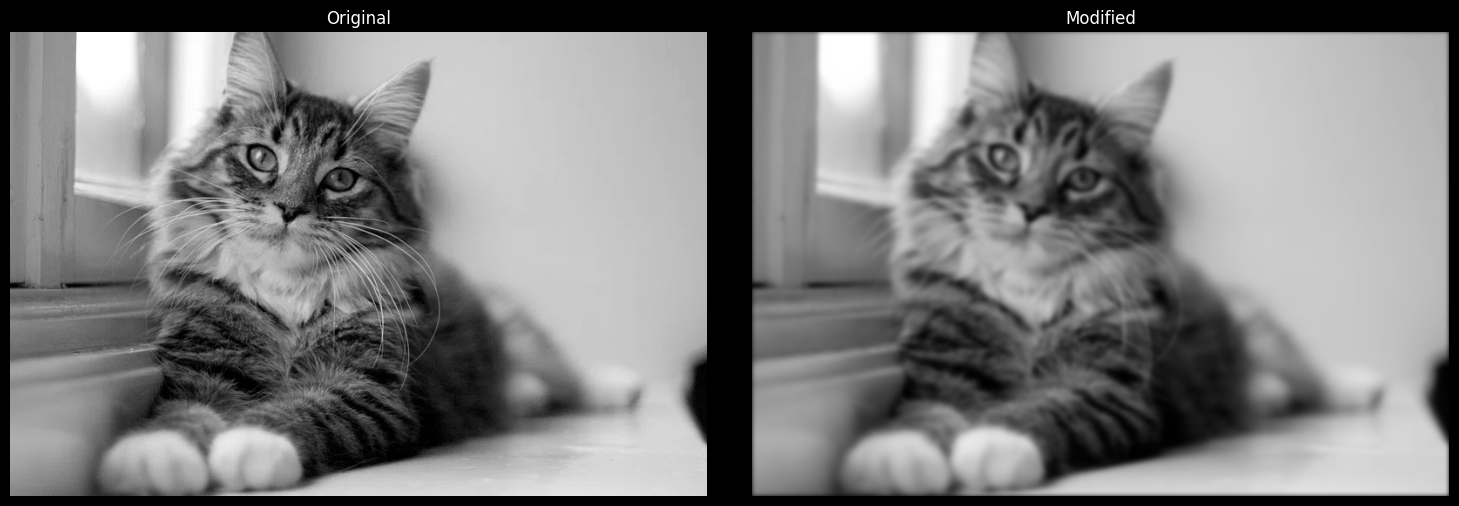

In [149]:
# Your code here
gauss = create_gaussian_kernel(size=15, sigma=2.5)
plt.style.use('dark_background')  # to fix a bug of my pycharm darkmode
im1 = gray
im2 = conv_2d(im1, kernel=gauss)
display_images([im1,im2],["Original", "Modified"])

## Exercise 2.2: Building Gaussian Pyramids

The following `downsample` and `upsample` functions will be useful for writing the build_gaussian_pyramid function:

In [150]:
def downsample(image):
    """Downsample image by factor of 2 using proper averaging

    Args:
        image (numpy.ndarray): Input image to downsample

    Returns:
        numpy.ndarray: Downsampled image at half the input resolution
    """
    return image[::2, ::2]

def upsample(image, original_shape):
    """Upsample image by factor of 2 using linear interpolation

    Args:
        image (numpy.ndarray): Input image
        original_shape (tuple): Shape to upsample to

    Returns:
        numpy.ndarray: Upsampled image
    """
    upsampled = np.zeros((image.shape[0]*2, image.shape[1]*2))
    upsampled[::2, ::2] = image
    # Linear interpolation
    upsampled[1::2, ::2] = upsampled[:-1:2, ::2]
    upsampled[::2, 1::2] = upsampled[::2, :-1:2]
    upsampled[1::2, 1::2] = upsampled[:-1:2, :-1:2]
    return upsampled[:original_shape[0], :original_shape[1]]

Implement the `build_gaussian_pyramid` function.

In [151]:
def build_gaussian_pyramid(image, levels=4, kernel_size=5, sigma=1.0):
    """Build Gaussian pyramid from input image

    Args:
        image (numpy.ndarray): Input image
        levels (int): Number of pyramid levels
        kernel_size (int): Size of Gaussian kernel
        sigma (float): Standard deviation of Gaussian

    Returns:
        list: Gaussian pyramid levels
    """
    # Your code here
    pyramid = [image]
    
    # Create Gaussian kernel
    gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
    gaussian_kernel = gaussian_kernel @ gaussian_kernel.T  # Convert to 2D kernel
    
    # Iteratively downsample the image
    for i in range(1, levels):
        # Apply Gaussian filter (convolution with the kernel)
        smoothed_image = cv2.filter2D(pyramid[-1], -1, gaussian_kernel)
        
        # Downsample the image
        downsampled_image = smoothed_image[::2, ::2]
        
        # Append the downsampled image to the pyramid
        pyramid.append(downsampled_image)
    
    return pyramid

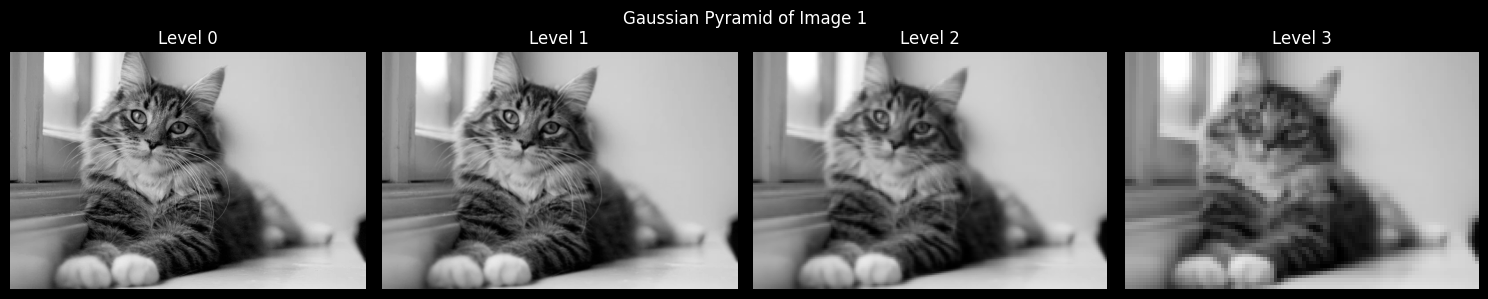

In [152]:
# Load a test image
image1 = gray
# Your code here
# Build and visualize Gaussian pyramid for first image
gauss_pyramid = build_gaussian_pyramid(image1)

# Visualize Gaussian pyramid
plt.style.use('dark_background')  # to fix a bug of my pycharm darkmode
plt.figure(figsize=(15, 3))
for i, level in enumerate(gauss_pyramid):
    plt.subplot(1, len(gauss_pyramid), i+1)
    plt.imshow(level, cmap='gray')
    plt.title(f'Level {i}')
    plt.axis('off')
plt.suptitle('Gaussian Pyramid of Image 1')
plt.tight_layout()
plt.show()

## Exercise 2.3: Laplacian Pyramid

Implement functions for:
1. Building the Laplacian pyramid
2. Reconstructing the original image from the Laplacian pyramid

Questions to consider:
- How does the Laplacian pyramid represent image details?
- What information is captured at each level?

Note:
There is a small error in the lecture notes - you do not blur after upsampling!

In [153]:
def build_laplacian_pyramid(gaussian_pyramid):
    """Build Laplacian pyramid from Gaussian pyramid

    Args:
        gaussian_pyramid (list): Gaussian pyramid levels

    Returns:
        list: Laplacian pyramid levels
    """
    # Your code here
    laplacian_pyramid = []
    levels = len(gaussian_pyramid)
    
    for i in range(levels - 1):
        # Upsample the next level image to match the current level's size
        upsampled = cv2.resize(gaussian_pyramid[i + 1], 
                               (gaussian_pyramid[i].shape[1], gaussian_pyramid[i].shape[0]),
                               interpolation=cv2.INTER_LINEAR)
        # Calculate the Laplacian (details)
        laplacian = cv2.subtract(gaussian_pyramid[i], upsampled)
        laplacian_pyramid.append(laplacian)
    
    # Add the smallest Gaussian level as the final Laplacian level
    laplacian_pyramid.append(gaussian_pyramid[-1])
    return laplacian_pyramid

def reconstruct_from_laplacian(laplacian_pyramid):
    """Reconstruct image from Laplacian pyramid

    Args:
        laplacian_pyramid (list): Laplacian pyramid levels

    Returns:
        numpy.ndarray: Reconstructed image
    """
    # Your code here
    image = laplacian_pyramid[-1]  # Start with the smallest level
    
    for i in range(len(laplacian_pyramid) - 2, -1, -1):
        # Upsample the current image
        upsampled = cv2.resize(image, 
                               (laplacian_pyramid[i].shape[1], laplacian_pyramid[i].shape[0]),
                               interpolation=cv2.INTER_LINEAR)
        # Add the Laplacian details
        image = cv2.add(upsampled, laplacian_pyramid[i])
    
    return image

Plot the pixel-wise error of the reconstruction using the Laplacian pyramid

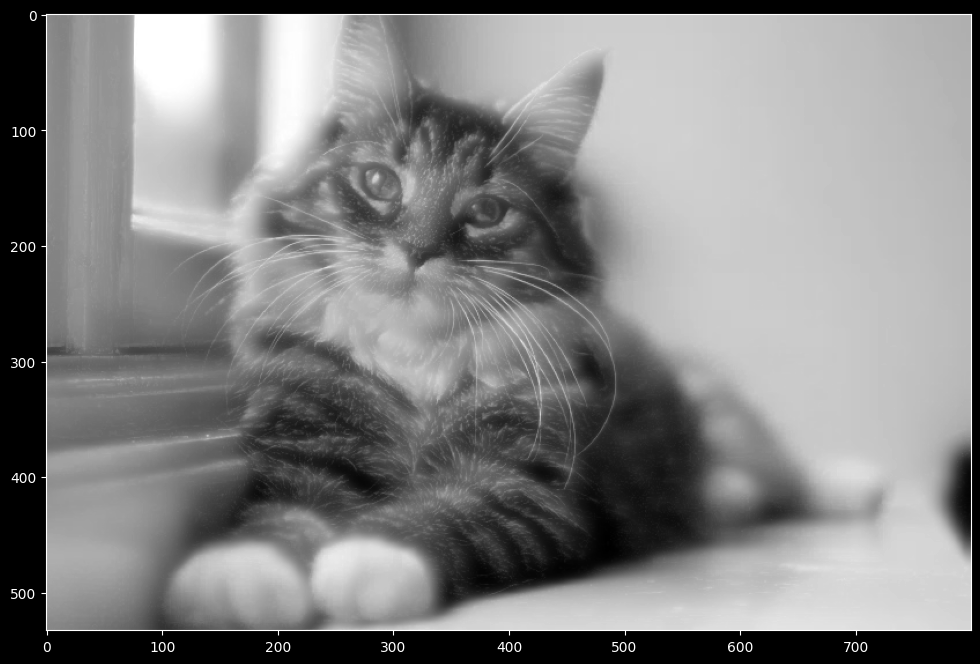

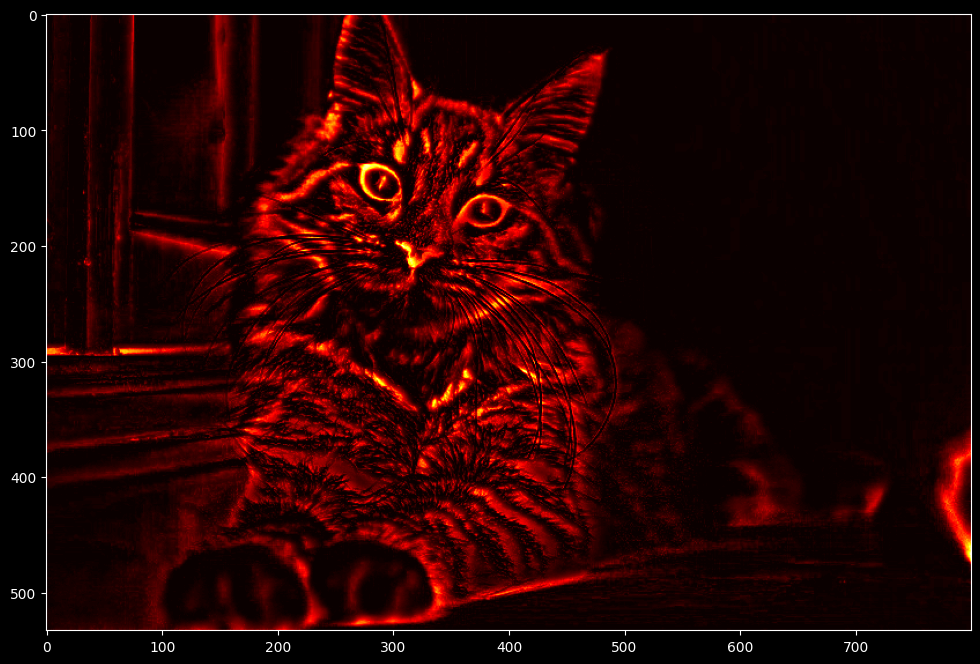

In [154]:
# Your code here
image = gray
laplacian = build_laplacian_pyramid(gauss_pyramid)
reconstruction = reconstruct_from_laplacian(laplacian)
error = np.abs(reconstruction - image)
plt.style.use('dark_background')  # to fix a bug of my pycharm darkmode
plt.imshow(reconstruction, cmap='gray')
plt.show()
plt.imshow(error, cmap='hot')
plt.show()

## Exercise 2.4: Multi-Scale Image Blending

Implement the pyramid blending algorithm:
1. Build Laplacian pyramids for both images
2. Build Gaussian pyramid for the mask
3. Blend pyramids at each scale
4. Reconstruct final result

In [155]:
def pyramid_blend(image1, image2, mask, levels=4):
    """Blend two images using pyramid blending

    Args:
        image1, image2 (numpy.ndarray): Images to blend
        mask (numpy.ndarray): Blending mask
        levels (int): Number of pyramid levels

    Returns:
        numpy.ndarray: Blended image
    """
    # Your code here
    gauss1 = build_gaussian_pyramid(image1, levels=levels, kernel_size=5, sigma=1.0)
    gauss2 = build_gaussian_pyramid(image2, levels=levels, kernel_size=5, sigma=1.0)
    
    laplacian1 = build_laplacian_pyramid(gauss1)
    laplacian2 = build_laplacian_pyramid(gauss2)
    
    # Build Gaussian pyramid for the mask
    gaussian_mask = build_gaussian_pyramid(mask.astype(np.float32), levels)
    
    # Blend Laplacian pyramids
    blended_pyramid = []
    for l1, l2, gm in zip(laplacian1, laplacian2, gaussian_mask):
        blended = l1 * gm + l2 * (1 - gm)
        blended_pyramid.append(blended)
    
    # Reconstruct the blended image
    blended_image = reconstruct_from_laplacian(blended_pyramid)
    return np.clip(blended_image, 0, 255).astype(np.uint8)

Demonstrate the pyramid blend on the grayscale images `racoon.jpg` and `crowd.jpg` using the mask provided in `blend_mask.jpg`

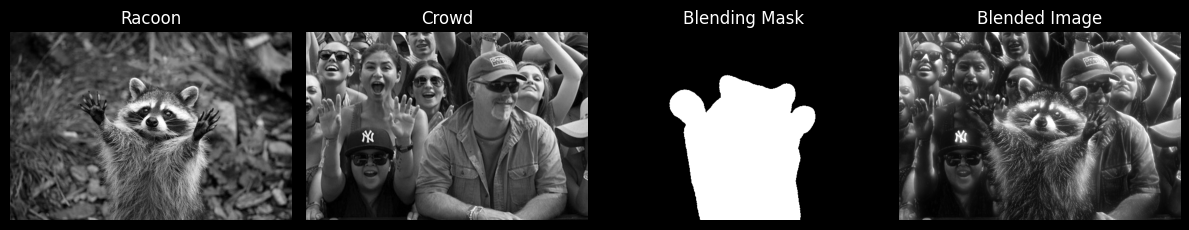

In [156]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input images and mask
racoon = cv2.imread('racoon.jpg', cv2.IMREAD_GRAYSCALE)
crowd = cv2.imread('crowd.jpg', cv2.IMREAD_GRAYSCALE)
mask = cv2.imread('blend_mask.png', cv2.IMREAD_GRAYSCALE)  # Load mask as grayscale

# Normalize the mask to [0, 1]
mask = mask.astype(np.float32) / 255.0

# Resize all images and mask to the same dimensions
height, width = racoon.shape
crowd = cv2.resize(crowd, (width, height))
mask = cv2.resize(mask, (width, height))

# Blend the images using pyramid blending
blended_image = pyramid_blend(image1=racoon, image2=crowd, mask=mask, levels=15)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(racoon, cmap='gray')
plt.title("Racoon")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(crowd, cmap='gray')
plt.title("Crowd")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mask, cmap='gray')
plt.title("Blending Mask")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blended_image, cmap='gray')
plt.title("Blended Image")
plt.axis('off')

plt.tight_layout()
plt.show()


How does the number of levels in the pyramid affect the blending?
With fewer levels, the blending focuses more on low-frequency components, resulting in smoother transitions but often leaving visible seams or artifacts, as fine details (high-frequency content) are not well captured. Conversely, increasing the number of pyramid levels allows the algorithm to incorporate finer details and textures, leading to a more seamless and natural blend between the images.

# Part 3: Edge Detection
## Exercise 3.1: Gradient Computation

Implement gradient computation using Sobel operators:
1. Define Sobel kernels
2. Compute x and y gradients
3. Calculate magnitude and direction

In [157]:
def compute_gradients(image):
    """Compute gradients using Sobel operators

    Args:
        image (numpy.ndarray): Input image

    Returns:
        tuple: (gradient magnitude, gradient direction in radians)
    """
    # Your code here
        # Define Sobel kernels
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)  # Horizontal edges

    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]], dtype=np.float32)  # Vertical edges

    # Compute x and y gradients using filter2D
    grad_x = cv2.filter2D(image, cv2.CV_32F, sobel_x)  # Gradient along x
    grad_y = cv2.filter2D(image, cv2.CV_32F, sobel_y)  # Gradient along y

    # Compute gradient magnitude
    magnitude = np.sqrt(grad_x**2 + grad_y**2)

    # Compute gradient direction (in radians)
    direction = np.arctan2(grad_y, grad_x)

    return magnitude, direction

## Exercise 3.2: Non-Maximum Suppression

Implement non-maximum suppression:
1. Convert gradient direction to angles
2. Compare magnitude with neighbors along gradient direction
3. Suppress non-maximum pixels

In [158]:
def non_maximum_suppression(magnitude, direction):
    """Apply non-maximum suppression to gradient magnitude

    Args:
        magnitude (numpy.ndarray): Gradient magnitude
        direction (numpy.ndarray): Gradient direction in radians

    Returns:
        numpy.ndarray: Suppressed gradient magnitude
    """
    # Your code here
    suppressed = np.zeros_like(magnitude, dtype=np.float32)
    
    # Convert direction to degrees and map it to one of 4 sectors (0, 45, 90, 135 degrees)
    direction_degrees = (direction * 180.0 / np.pi) % 180  # Convert to [0, 180)
    
    # Iterate through the image (excluding borders)
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            # Quantize the gradient direction into 4 sectors
            angle = direction_degrees[i, j]
            q, r = 255, 255  # Default values for comparison pixels
            
            # Determine the neighboring pixels based on gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):  # Horizontal edge
                q = magnitude[i, j + 1]
                r = magnitude[i, j - 1]
            elif (22.5 <= angle < 67.5):  # Diagonal edge (top-right to bottom-left)
                q = magnitude[i - 1, j + 1]
                r = magnitude[i + 1, j - 1]
            elif (67.5 <= angle < 112.5):  # Vertical edge
                q = magnitude[i - 1, j]
                r = magnitude[i + 1, j]
            elif (112.5 <= angle < 157.5):  # Diagonal edge (top-left to bottom-right)
                q = magnitude[i - 1, j - 1]
                r = magnitude[i + 1, j + 1]
            
            # Suppress non-maximum pixels
            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                suppressed[i, j] = magnitude[i, j]
            else:
                suppressed[i, j] = 0

    return suppressed

## Exercise 3.3: Double Thresholding and Edge Tracking

Implement:
1. Double thresholding to identify strong/weak edges
2. Edge tracking by hysteresis

In [159]:
def double_threshold(image, low_ratio=0.05, high_ratio=0.15):
    """Apply double thresholding to classify edges

    Args:
        image (numpy.ndarray): Input image
        low_ratio (float): Low threshold ratio
        high_ratio (float): High threshold ratio

    Returns:
        tuple: (strong edges, weak edges)
    """
    # Your code here
        # Determine high and low thresholds based on ratios
    high_threshold = image.max() * high_ratio
    low_threshold = high_threshold * low_ratio

    # Classify edges
    strong_edges = np.zeros_like(image, dtype=np.uint8)
    weak_edges = np.zeros_like(image, dtype=np.uint8)

    strong_edges[image >= high_threshold] = 255  # Strong edges
    weak_edges[(image >= low_threshold) & (image < high_threshold)] = 255  # Weak edges

    return strong_edges, weak_edges

def edge_tracking(strong_edges, weak_edges):
    """Track edges using hysteresis.

    Args:
        strong_edges (numpy.ndarray): Binary image of strong edges
        weak_edges (numpy.ndarray): Binary image of weak edges

    Returns:
        numpy.ndarray: Final binary edge image
    """
    # Your code here
        # Copy strong edges as the starting point
    final_edges = np.copy(strong_edges)
    h, w = strong_edges.shape

    # Directions to check 8-connectivity
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    # Iterate through weak edges to check for connectivity with strong edges
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            if weak_edges[i, j] == 255:  # Check if it's a weak edge
                for di, dj in directions:
                    if strong_edges[i + di, j + dj] == 255:
                        final_edges[i, j] = 255  # Promote weak edge to strong edge
                        break  # No need to check further neighbors

    return final_edges

## Exercise 3.4: Complete Canny Edge Detector

Combine all components into a complete Canny edge detector:
1. Gaussian smoothing
2. Gradient computation
3. Non-maximum suppression
4. Double thresholding
5. Edge tracking

In [160]:
def canny_edge_detector(image, kernel_size=5, sigma=1.0,
                       low_ratio=0.05, high_ratio=0.15):
    """Complete Canny edge detection implementation

    Args:
        image (numpy.ndarray): Input image
        kernel_size (int): Size of Gaussian kernel
        sigma (float): Standard deviation of Gaussian
        low_ratio (float): Low threshold ratio
        high_ratio (float): High threshold ratio

    Returns:
        dict: Dictionary containing final edges and intermediate results
    """
    # Your code here
        # Step 1: Gaussian smoothing
    gauss = create_gaussian_kernel(kernel_size, sigma)
    smoothed = conv_2d(im1, kernel=gauss)

    # Step 2: Compute gradients
    magnitude, direction = compute_gradients(smoothed)

    # Step 3: Non-maximum suppression
    suppressed = non_maximum_suppression(magnitude, direction)

    # Step 4: Double thresholding
    strong_edges, weak_edges = double_threshold(suppressed, low_ratio, high_ratio)

    # Step 5: Edge tracking by hysteresis
    final_edges = edge_tracking(strong_edges, weak_edges)

    # Return all intermediate results for visualization
    return {
        'smoothed': smoothed,
        'magnitude': magnitude,
        'direction': direction,
        'suppressed': suppressed,
        'strong_edges': strong_edges,
        'weak_edges': weak_edges,
        'final_edges': final_edges
    }

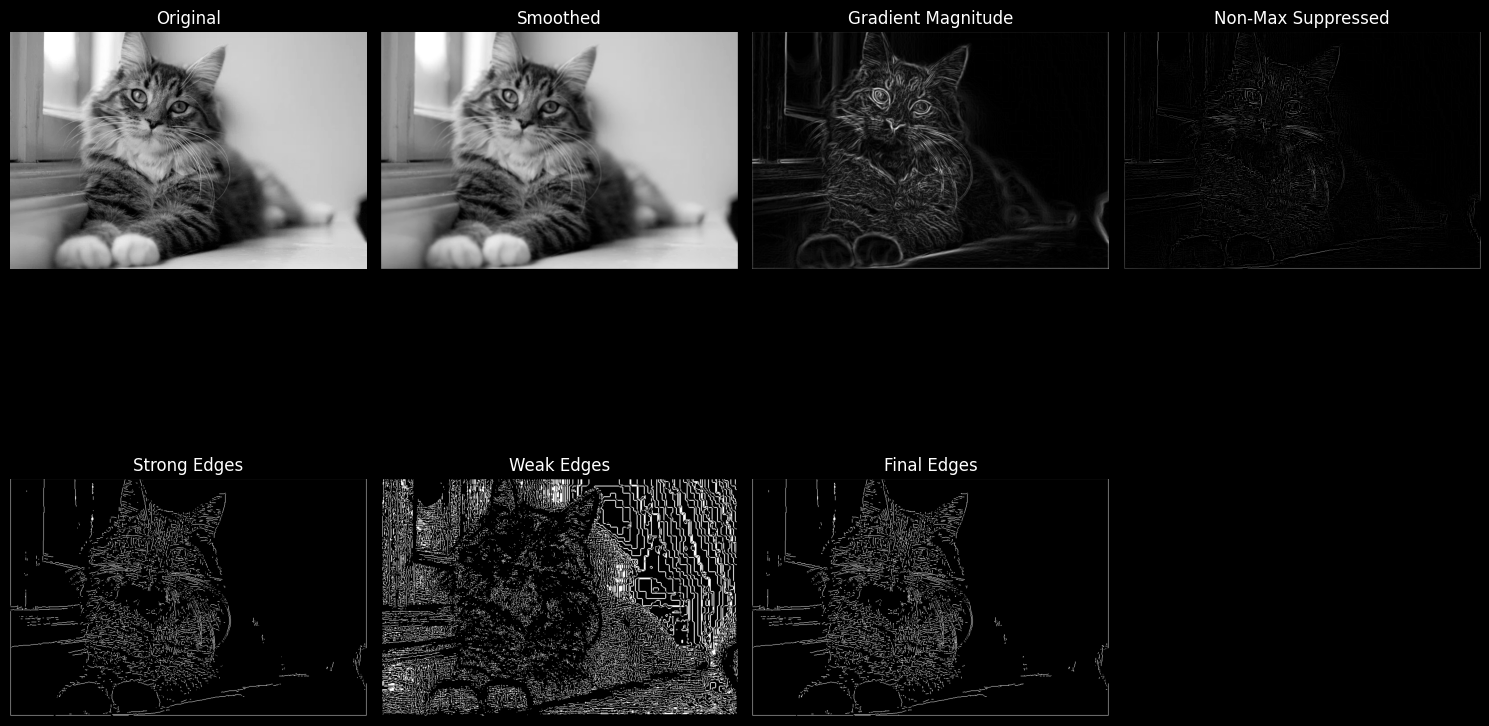

In [161]:
image = gray
# Run Canny Edge Detector
results = canny_edge_detector(image)

# Display all intermediate results
titles = ['Original', 'Smoothed', 'Gradient Magnitude', 'Non-Max Suppressed', 
          'Strong Edges', 'Weak Edges', 'Final Edges']
images = [image, results['smoothed'], results['magnitude'], results['suppressed'], 
          results['strong_edges'], results['weak_edges'], results['final_edges']]

plt.figure(figsize=(15, 10))
for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

Questions to consider:

1. How does changing sigma in the Gaussian smoothing affect the detected edges?
- How does it impact noise sensitivity?
- What happens to fine details as sigma increases?

2. Why do we need both gradient magnitude and direction?
- What information does each component provide?
- How do they work together in edge detection?

3. Analyze the role of non-maximum suppression:
- What problem does it solve?
- How would edges look without it?

Increasing sigma reduces noise sensitivity by smoothing out small fluctuations in the image. However, as sigma increases, fine details may be lost.

The gradient magnitude indicates the strength of edges. The direction of the gradient provides the direction of suppression in the algo.

Non-maximum suppression helps thin the edges by keeping only the local maxima along the gradient direction. It ensures that edges are sharp and well-defined instead of being thick or blurry.